/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 1: val_mae improved from inf to 45.56895, saving model to weights.best.h5.keras

Epoch 2: val_mae improved from 45.56895 to 36.83213, saving model to weights.best.h5.keras

Epoch 3: val_mae improved from 36.83213 to 33.24993, saving model to weights.best.h5.keras

Epoch 4: val_mae did not improve from 33.24993

Epoch 5: val_mae improved from 33.24993 to 31.43664, saving model to weights.best.h5.keras

Epoch 6: val_mae did not improve from 31.43664

Epoch 7: val_mae did not improve from 31.43664

Epoch 8: val_mae improved from 31.43664 to 30.78403, saving model to weights.best.h5.keras

Epoch 9: val_mae improved from 30.78403 to 30.38019, saving model to weights.best.h5.keras

Epoch 10: val_mae did not improve from 30.38019

Epoch 11: val_mae improved from 30.38019 to 30.24530, saving model to weights.best.h5.keras

Epoch 12: val_mae did not improve from 30.24530

Epoch 13: val_mae did not improve from 30.24530

Epoch 14: val_mae improved from 30.24530 to 30.12359, saving model t

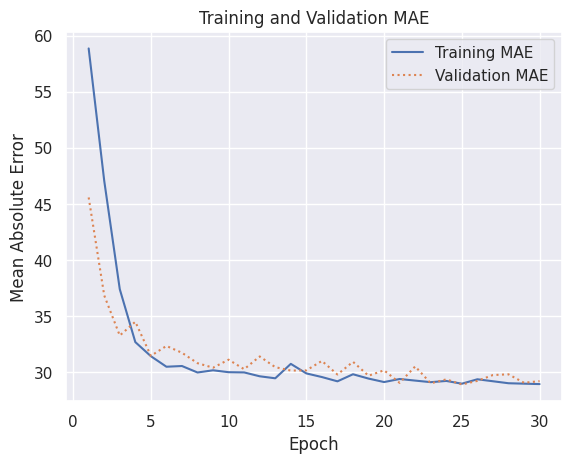

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.models import load_model
from sklearn.linear_model import LinearRegression
filepath=""
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#-------------------------------------------------data preprocessing------------------------------------------------------------------

# Define the URL of a CSV file containing data.
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_7_Neural_networks/Exercise7data.csv'

# Read the CSV data from the specified URL into a DataFrame (assuming you have the pandas library imported as 'pd').
df = pd.read_csv(url)

# Limit the DataFrame to the first 1000 rows (selecting a subset of the data).
df = df.iloc[:1000]

# Drop specific columns (Arrival_time, Stop_id, Bus_id, Line_id) from the DataFrame.
df = df.drop(['Arrival_time', 'Stop_id', 'Bus_id', 'Line_id'], axis=1)

# Extract the features (input variables) by dropping the 'Arrival_delay' column.
x = df.drop(['Arrival_delay'], axis=1)

# Extract the target variable ('Arrival_delay') as the variable to predict.
y = df['Arrival_delay']

# splite the train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
### Tuning:

#-------------------------------------------------network construction------------------------------------------------------------------

#************************************************Here you can change the layer to construct your network(add the dense layers, dropout layer, etc.)***************************
# Create a Sequential model, which is a linear stack of layers.
model = Sequential()



# Add a Dense layer with 32 units, ReLU activation, and an input dimension of 4.
model.add(Dense(32, activation='relu', input_dim=4))
### tuning: model.add(Dropout(0.3))



# Add another Dense layer with 64 units and ReLU activation.
model.add(Dense(64, activation='relu'))

### tuning: adda layer
#model.add(Dense(128, activation='relu'))



# Add a final Dense layer with 1 unit (typically used for regression tasks).
model.add(Dense(1))

# Compile the model with the Adam optimizer, Mean Absolute Error (MAE) loss function,
# and MAE metric to be used during training.
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
#************************************************Here you can change the layer to construct your network(add the layers, dropout layer, etc.)*****************

#-------------------------------------------------model train------------------------------------------------------------------
#************************************************Here you can use the callback function **************
# use the callback function to early stop, learning rate ajusting, save the best model
# Create an EarlyStopping callback to monitor the validation mean absolute error (val_mae).
# It will stop training if val_mae doesn't improve for 5 consecutive epochs and restores the best weights.
early_stop = EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)
#### Tuning: test higher patience
#early_stop = EarlyStopping(monitor='val_mae', patience=100, restore_best_weights=True)
# Create a ReduceLROnPlateau callback to monitor val_mae.
# It reduces the learning rate by a factor of 0.5 if val_mae doesn't improve for 3 consecutive epochs.
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=3)

### tuning - change learning rate reduction
#reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.1, patience=3)
#reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.9, patience=3)


# Define the file path where the best model weights will be saved.
#filepath = "weights.best.h5"
filepath = "weights.best.h5.keras"
# Create a ModelCheckpoint callback to monitor the validation mae (val_mae).
# The callback will save the model's weights only if the validation mae improves.
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')

# Train the model using the fit method.
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)
### Tune lowering validation split to have more data for training
#hist = model.fit(X_train, y_train, validation_split=0.1, epochs=200, batch_size=32, callbacks=[early_stop, reduce_lr,checkpoint],verbose=0)

#************************************************Here you can choose to use the callback function *************

# Set the style of the plots using seaborn.
sns.set()

# Extract the training and validation Mean Absolute Error (MAE) from the training history.
err = hist.history['mae']
val_err = hist.history['val_mae']

# Define the number of epochs.
epochs = range(1, len(err) + 1)

# Plot the Training MAE and Validation MAE over epochs.
plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

# Use the trained model to predict on the test data.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2) for the predictions.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics.
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# **Assignment task: Find the best neural network model for the bus delay prediction(assignment submission)**
Tuning the neural network models (e.g., dropout, sizing of the network), and finding the best neural network model.

#Tuning results

**original model from exercise evaluation**

Mean Absolute Error: 27.85806732658297 <br>
Mean Squared Error: 1420.7528978215332<br>
R-squared: 0.8795767033492812<br><br>


**Model add dropout 0.3 on the layer with 32 units**

Mean Absolute Error: 29.109191292971374<br>
Mean Squared Error: 1487.8263262236217<br>
R-squared: 0.8738915462904918<br><br>


**Model add dropout 0.3 on the layer with 32 units
and 64 units**

Mean Absolute Error: 30.192801364809274<br>
Mean Squared Error: 1585.179151722944<br>
R-squared: 0.865639901544339<br><br>


**Add one more layer with 128 units**

Mean Absolute Error: 28.55868503153324<br>
Mean Squared Error: 1437.120482722915<br>
R-squared: 0.8781893836154575<br><br>

**change early stop to patience 10**

Mean Absolute Error: 28.408884845227004<br>
Mean Squared Error: 1458.5765037631882<br>
R-squared: 0.8763707670279857<br><br>

**change early stop to patience 100**
Mean Absolute Error: 27.787500740624964<br>
Mean Squared Error: 1407.8576123239152<br>
R-squared: 0.8806697102988053<br><br>



**change learning rate reduction to 0.1**
Mean Absolute Error: 29.279222042635084<br>
Mean Squared Error: 1493.569960287788<br>
R-squared: 0.8734047147310963<br><br>

**change learning rate reduction to 0.9**
Mean Absolute Error: 28.243674913644792<br>
Mean Squared Error: 1425.0896394568338<br>
R-squared: 0.879209120270446<br><br>

**lowering validation split to have more data for training**

Mean Absolute Error: 28.03465370774269<br>
Mean Squared Error: 1425.7829096130151<br>
R-squared: 0.879150358554876
